# Movies Dataset Analysis - Project

__Some additional information on Features/Columns__:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

Imports that we will need accomplishing our project.

In [3]:
from IPython.display import HTML

In [157]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 10

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

## Data Import and first Inspection

Importing the movies dataset from the CSV file "movies_complete.csv".

In [517]:
df = pd.read_csv('movies_complete.csv', parse_dates = ['release_date'])

Inspecting our data.

In [518]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animat...,Toy St...,en,30.00,373.55,Pixar ...,...,7.70,21.95,81.00,Led by...,English,<img s...,Tom Ha...,13,106,John L...
1,8844,Jumanji,Roll t...,1995-12-15,Advent...,NaN,en,65.00,262.80,TriSta...,...,6.90,17.02,104.00,When s...,Englis...,<img s...,Robin ...,26,16,Joe Jo...
2,15602,Grumpi...,Still ...,1995-12-22,Romanc...,Grumpy...,en,NaN,NaN,Warner...,...,6.50,11.71,101.00,A fami...,English,<img s...,Walter...,7,4,Howard...
3,31357,Waitin...,Friend...,1995-12-22,Comedy...,NaN,en,16.00,81.45,Twenti...,...,6.10,3.86,127.00,Cheate...,English,<img s...,Whitne...,10,10,Forest...
4,11862,Father...,Just W...,1995-02-10,Comedy,Father...,en,NaN,76.58,Sandol...,...,5.70,8.39,106.00,Just w...,English,<img s...,Steve ...,12,7,Charle...


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [520]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


At first we should make our data more visible.

In [521]:
df.index.name = 'Title'
df.set_index(keys = 'title', inplace = True)
df.drop(columns = ['id'], inplace = True)
df.rename(columns = {'poster_path': ' '}, inplace = True)

In [522]:
df.head(5)

,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,,cast,cast_size,crew_size,director
title,,,,,,,,,,,,,,,,,,,,
Toy Story,NaN,1995-10-30,Animat...,Toy St...,en,30.00,373.55,Pixar ...,United...,5415.00,7.70,21.95,81.00,Led by...,English,<img s...,Tom Ha...,13,106,John L...
Jumanji,Roll t...,1995-12-15,Advent...,NaN,en,65.00,262.80,TriSta...,United...,2413.00,6.90,17.02,104.00,When s...,Englis...,<img s...,Robin ...,26,16,Joe Jo...
Grumpier Old Men,Still ...,1995-12-22,Romanc...,Grumpy...,en,NaN,NaN,Warner...,United...,92.00,6.50,11.71,101.00,A fami...,English,<img s...,Walter...,7,4,Howard...
Waiting to Exhale,Friend...,1995-12-22,Comedy...,NaN,en,16.00,81.45,Twenti...,United...,34.00,6.10,3.86,127.00,Cheate...,English,<img s...,Whitne...,10,10,Forest...
Father of the Bride Part II,Just W...,1995-02-10,Comedy,Father...,en,NaN,76.58,Sandol...,United...,173.00,5.70,8.39,106.00,Just w...,English,<img s...,Steve ...,12,7,Charle...


Let's make a heatmap showing correlation between features.

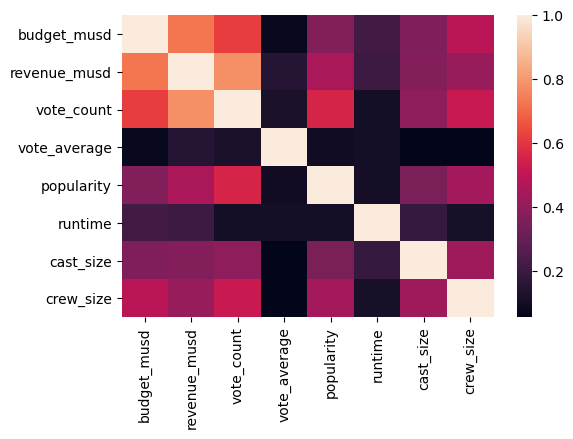

In [523]:
plt.figure(dpi = 100)
sns.heatmap(df.corr())
plt.show()

We can visualize our data using matplotlib.

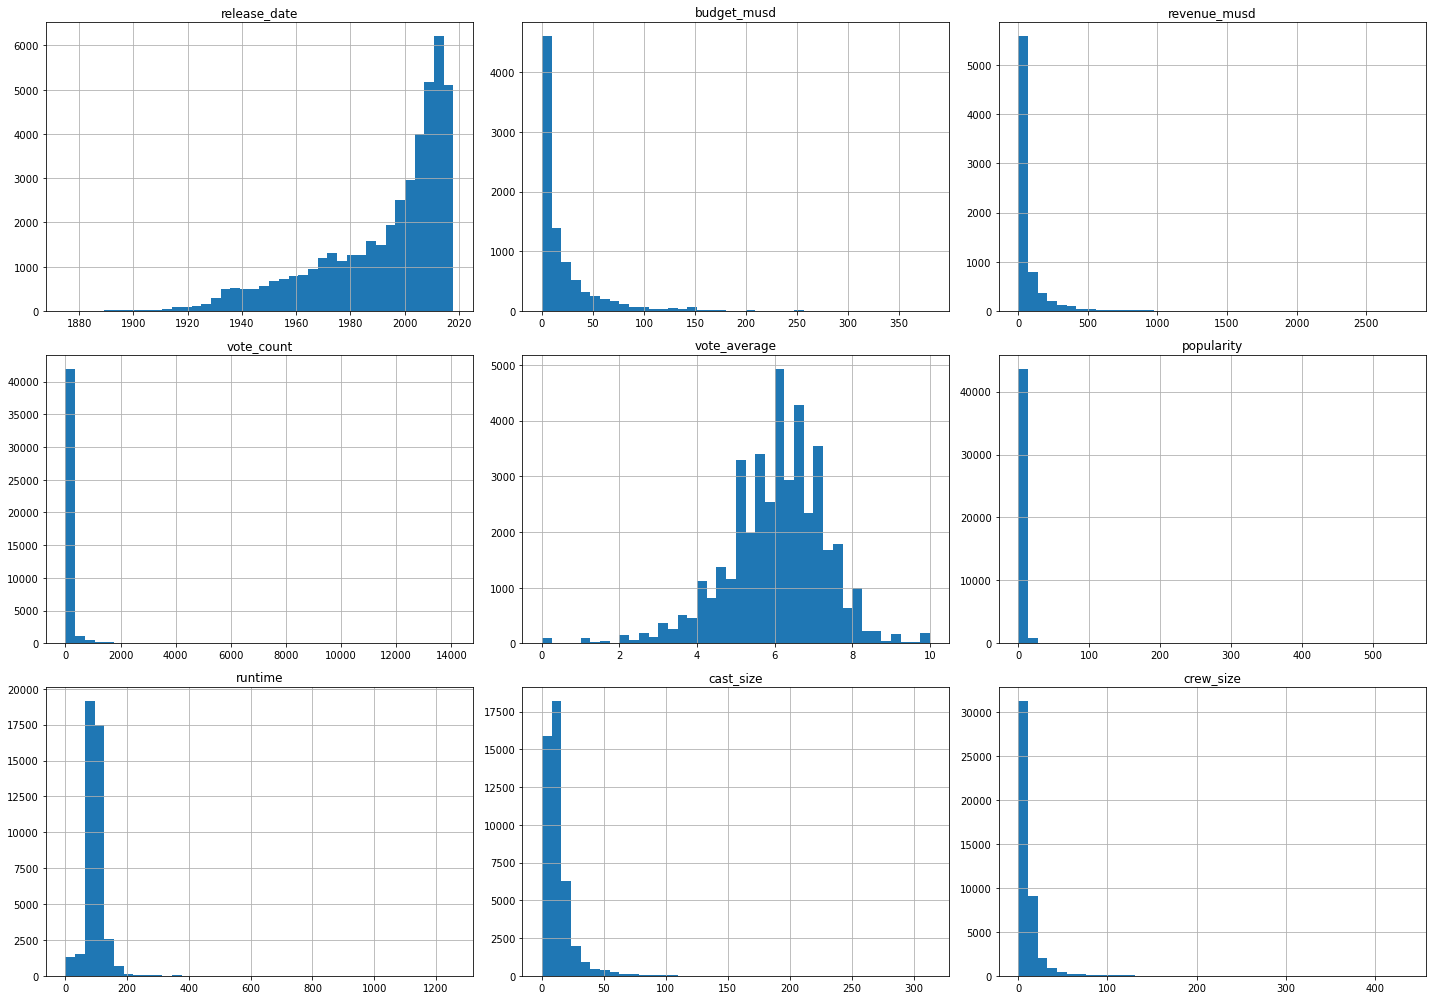

In [487]:
df.hist(figsize = (20,14), bins = 40)
plt.tight_layout()
plt.show()

## Filter the Dataset and find the best/worst movies

Define a function that will help us filter the data

In [524]:
def best_worst(data, by, asc, n, min_budget = 0, min_votes = 0):
    df_c = df.copy()
    slice_df = df_c.loc[(df.budget_musd >= min_budget) & (df.vote_count >= min_votes),
           [' ',by]].sort_values(by = by, ascending = asc).head(n)
    return HTML(slice_df.to_html(escape = False))

__Movies Top 5 - Highest Revenue__

In [525]:
best_worst(data = df, by = 'revenue_musd',asc = False, n = 5)

,,revenue_musd
title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [526]:
best_worst(data = df, by = 'budget_musd',asc = False, n = 5)

,,budget_musd
title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
John Carter,,260.00


__Movies Top 5 - Lowest Profit__

In [527]:
df['movie_profit'] = df.revenue_musd.subtract(df.budget_musd)

In [528]:
best_worst(data = df, by = 'movie_profit',asc = True, n = 5)

,,movie_profit
title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [529]:
df["movie_roi"] = df.revenue_musd.div(df.budget_musd)

In [530]:
best_worst(data = df, by = 'movie_roi',asc = False, n = 5, min_budget = 50)

,,movie_roi
title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


## Filter the Dataset for movies that meet the following conditions

__Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating).__

In [547]:
director_mask = df.cast.str.contains('Bruce Willis')
genres_mask = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')

science = df.loc[(director_mask & genres_mask),
       [' ','genres','vote_average']].sort_values('vote_average', ascending = False).head(3)
HTML(science.to_html(escape = False))

,,genres,vote_average
title,,,
The Fifth Element,,Adventure|Fantasy|Action|Thriller|Science Fiction,7.30
Looper,,Action|Thriller|Science Fiction,6.60
Armageddon,,Action|Thriller|Science Fiction|Adventure,6.50


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime).__

In [550]:
cast_mask = df.cast.str.contains('Uma Thurman')
director_mask = df.director.str.contains('Quentin Tarantino')

uma = df.loc[cast_mask & director_mask,
       [' ','director','runtime']].sort_values('runtime', ascending = True).head(3)
HTML(uma.to_html(escape = False))

,,director,runtime
title,,,
Kill Bill: Vol. 1,,Quentin Tarantino,111.00
Kill Bill: Vol. 2,,Quentin Tarantino,136.00
Pulp Fiction,,Quentin Tarantino,154.00


__Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue).__

In [537]:
studio_mask = df.production_companies.str.contains('Pixar')
date_mask = df.release_date.between('2010-01-01','2015-12-31')

pix = df.loc[studio_mask & date_mask,
       [' ','production_companies', 'release_date','revenue_musd']].sort_values('revenue_musd').head(3)
HTML(pix.to_html(escape = False))

,,production_companies,release_date,revenue_musd
title,,,,
The Good Dinosaur,,Walt Disney Pictures|Pixar Animation Studios,2015-11-14,331.93
Brave,,Walt Disney Pictures|Pixar Animation Studios,2012-06-21,538.98
Cars 2,,Walt Disney Pictures|Pixar Animation Studios,2011-06-11,559.85


__Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [539]:
genres_mask = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
language_mask = df.original_language == 'en'
rating_mask = df.vote_average > 7.5
votes_mask = df.vote_count >= 1000

action = df.loc[genres_mask & language_mask & rating_mask & votes_mask, 
      [' ','genres','original_language','vote_average','vote_count','release_date']].sort_values('release_date', ascending = False).head(3)
HTML(action.to_html(escape = False))

,,genres,original_language,vote_average,vote_count,release_date
title,,,,,,
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,en,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,en,7.60,6310.00,2017-02-28
Spotlight,,Drama|Thriller|History,en,7.80,2751.00,2015-11-06


## Are Franchises more successful?

In [288]:
df['collection'] = df.belongs_to_collection.notna()
dictionary = {True: 'Franchise', False: 'Stand-alone'}
df['collection'] = df['collection'].map(dictionary)

__Franchise vs. Stand-alone: Average Revenue.__

In [293]:
df.groupby(by = 'collection').revenue_musd.mean()

collection
Franchise     165.71
Stand-alone    44.74
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median).__

In [294]:
df.groupby(by = 'collection').movie_roi.median()

collection
Franchise     3.71
Stand-alone   1.62
Name: movie_roi, dtype: float64

__Franchise vs. Stand-alone: Average Budget.__

In [295]:
df.groupby(by = 'collection').budget_musd.mean()

collection
Franchise     38.32
Stand-alone   18.05
Name: budget_musd, dtype: float64

## Most Successful Franchises

In [404]:
franchises = df.groupby("belongs_to_collection").agg({"belongs_to_collection":"count",
                                                      "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean",
                                                      "vote_count":"mean"
                                                      })

In [476]:
franchises.head(5)

belongs_to_collection budget_musd       revenue_musd         \
                           count         sum  mean          sum   mean   
belongs...                                                               
... Has...          2                130.00  65.00     366.78   183.39   
00 Schn...          1                  0.00    NaN       0.00      NaN   
08/15 C...          1                  0.00    NaN       0.00      NaN   
100 Gir...          2                  0.00    NaN       0.00      NaN   
101 Dal...          2                  4.00   4.00     215.88   215.88   

           vote_average vote_count  
                   mean       mean  
belongs...                          
... Has...       6.00      2333.00  
00 Schn...       6.50        16.00  
08/15 C...       5.90         4.00  
100 Gir...       5.15        64.00  
101 Dal...       6.25       937.00

__Total number of movies.__

In [392]:
franchises.nlargest(5,('belongs_to_collection','count'))

belongs_to_collection budget_musd       revenue_musd         \
                           count         sum  mean          sum   mean   
belongs...                                                               
The Bow...         29                  0.00    NaN       0.00      NaN   
Totò Co...         27                  0.00    NaN       0.00      NaN   
James B...         26               1539.65  59.22    7106.97   273.35   
Zatôich...         26                  0.00    NaN       0.00      NaN   
The Car...         25                  0.00    NaN       0.00      NaN   

           vote_average  
                   mean  
belongs...               
The Bow...       6.67    
Totò Co...       6.84    
James B...       6.34    
Zatôich...       6.40    
The Car...       6.17

__Total & mean budget.__

In [393]:
franchises.budget_musd.sort_values(['sum','mean'],ascending = False).head(5)

,sum,mean
belongs_to_collection,,
James Bond Collection,1539.65,59.22
Harry Potter Collection,1280.00,160.00
Pirates of the Caribbean Collection,1250.00,250.00
The Fast and the Furious Collection,1009.00,126.12
X-Men Collection,983.00,163.83


__Total & mean revenue.__

In [419]:
franchises.revenue_musd.sort_values(['sum','mean'],ascending = False).head(5)

,sum,mean
belongs_to_collection,,
Harry Potter Collection,7707.37,963.42
Star Wars Collection,7434.49,929.31
James Bond Collection,7106.97,273.35
The Fast and the Furious Collection,5125.10,640.64
Pirates of the Caribbean Collection,4521.58,904.32


__Mean rating.__

In [417]:
rating_mask = franchises['vote_count','mean'] > 1000
franchises.loc[rating_mask].sort_values(('vote_average','mean'), ascending = False).head(5)

belongs_to_collection budget_musd        revenue_musd         \
                           count         sum   mean          sum   mean   
belongs...                                                                
The Lor...          3                266.00   88.67    2916.54   972.18   
The God...          3                 73.00   24.33     429.38   143.13   
Blade R...          1                 28.00   28.00      33.14    33.14   
The Man...          3                  2.00    0.67      35.50    11.83   
The Dar...          3                585.00  195.00    2463.72   821.24   

           vote_average vote_count  
                   mean       mean  
belongs...                          
The Lor...       8.03      8253.00  
The God...       7.97      3677.00  
Blade R...       7.90      3833.00  
The Man...       7.83      1422.67  
The Dar...       7.80      9681.00

## Most Successful Directors

In [553]:
directors = df.groupby('director').agg({'director': 'count' ,'vote_average': 'mean',
                                        'revenue_musd': 'sum', 'vote_count': 'mean', 'vote_average': 'mean' })
directors.head()

,director,vote_average,revenue_musd,vote_count
director,,,,
Dale Trevillion\t,2,4.00,0.00,2.00
Davide Manuli,1,6.90,0.00,10.00
E.W. Swackhamer,1,5.90,0.00,5.00
Vitaliy Vorobyov,1,5.50,0.00,3.00
Yeon Sang-Ho,4,6.60,2.13,259.75


__Total number of movies.__

In [458]:
directors.nlargest(5,'director')

,director,vote_average,revenue_musd,vote_count
director,,,,
John Ford,66,6.38,85.17,33.48
Michael Curtiz,65,6.00,37.82,38.09
Werner Herzog,54,6.81,24.57,46.59
Alfred Hitchcock,53,6.64,250.11,240.98
Georges Méliès,49,5.93,0.00,16.86


__Total revenue.__

In [451]:
directors.nlargest(5,'revenue_musd')

,director,vote_average,revenue_musd,vote_count
director,,,,
Steven Spielberg,33,6.89,9256.62,1886.85
Peter Jackson,13,7.14,6528.24,3659.31
Michael Bay,13,6.39,6437.47,2212.85
James Cameron,11,6.93,5900.61,3066.91
David Yates,9,6.70,5334.56,3450.67


__Mean rating.__

In [463]:
vote_mask = directors.vote_count > 1000
directors.loc[vote_mask].nlargest(5, 'vote_average')

,director,vote_average,revenue_musd,vote_count
director,,,,
Garth Davis,1,8.00,140.30,1699.00
Tony Kaye,3,7.87,23.95,1158.00
Hayao Miyazaki,14,7.70,995.90,1050.00
Stephen Chbosky,1,7.70,33.40,3056.00
Jan Pinkava,2,7.65,623.72,2409.50
